# Consensus clustering community detection
Reference: Lancichinetti, Andrea, and Santo Fortunato. "Consensus clustering in complex networks." _Scientific reports 2_ (2012): 336.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import igraph
import leidenalg
import numpy as np
import itertools
import pandas as pd
from nwtools import communities, consensus

Import Zachary karate club dataset [W. W. Zachary, An
information flow model for conflict and fission in small groups, Journal of
Anthropological Research 33, 452-473 (1977).]

In [2]:
g_karate = igraph.load('/media/sf_VBox_Shared/networks/karate/karate.gml')

In [3]:
g_law = igraph.load('/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/subnetwork/article_to_article_wgaansi.graphml')

Iteration 0
Iteration 1
Converged!


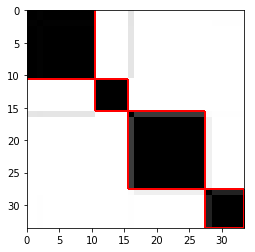

In [4]:
cons1_karate, part1_karate = consensus.consensus_partition(g_karate, verbose=True)
communities.plot_sorted_adjacency(cons1_karate, part1_karate)

Iteration 0
Iteration 1
Converged!


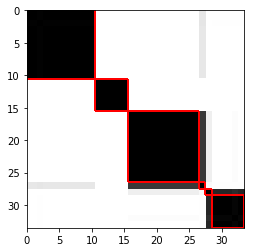

In [5]:
cons2_karate, part2_karate = consensus.consensus_partition(g_karate, threshold=0.9, verbose=True, singleton_clusters=True)
communities.plot_sorted_adjacency(cons2_karate, part2_karate)

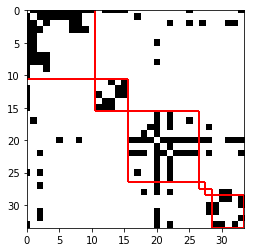

In [6]:
adj = np.array(g_karate.get_adjacency().data)
communities.plot_sorted_adjacency(adj, part2_karate)

In [7]:
cons1_law, partition1_law = consensus.consensus_partition(g_law, threshold=0.9, weights='weight')

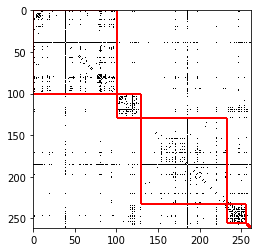

In [8]:
adj = np.array(g_law.get_adjacency().data)
communities.plot_sorted_adjacency(adj, partition1_law)

In [9]:
pd.Series(partition1_law).value_counts()

2    103
0    101
1     29
3     23
6      2
5      2
4      2
dtype: int64

In [10]:
cons2_law, partition2_law = consensus.consensus_partition(g_law, threshold=0.5, weights='weight')

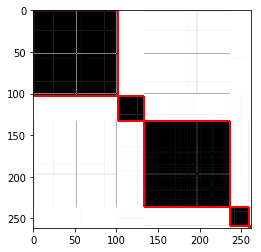

In [11]:
communities.plot_sorted_adjacency(cons2_law, partition2_law)

In [12]:
g_law.vs['consensus'] = partition2_law

In [13]:
g_law.write_graphml('/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/subnetwork/article_to_article_consensus.graphml')

In [14]:
import matplotlib 
cm = matplotlib.cm.get_cmap('tab10')
cmap = {t: cm(t/10) for t in range(10)}

layout = g_karate.layout('kk')

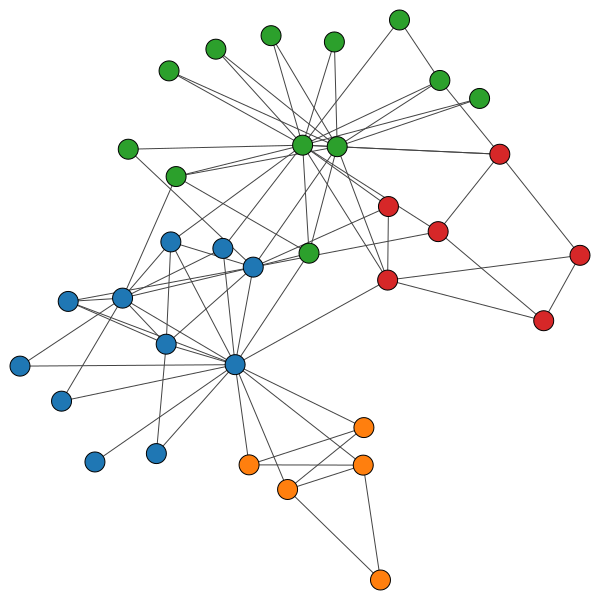

In [15]:
igraph.plot(g_karate,
           vertex_color = [cmap[c] for c in part1_karate], layout=layout)

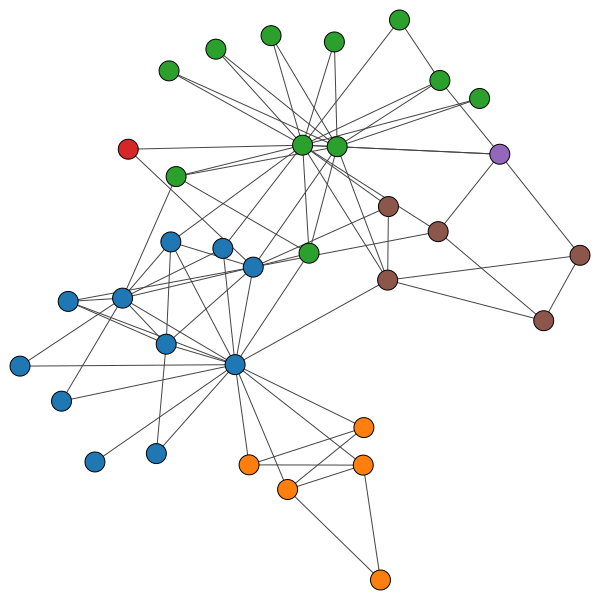

In [16]:
igraph.plot(g_karate,
           vertex_color = [cmap[c] for c in part2_karate], layout=layout)

In [17]:
partitions = consensus.get_initial_partitions(g_karate)
consensus_mat = consensus.get_consensus_matrix(partitions, g_karate.vcount())
consensus_mat2, consensus_part = consensus.consensus_partition(g_karate, initial_partition=partitions, verbose=True)

Iteration 0
Iteration 1
Converged!


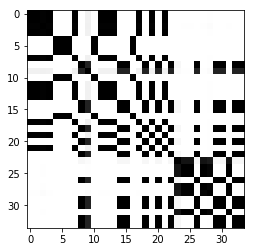

In [18]:
plt.imshow(consensus_mat, cmap='Greys')

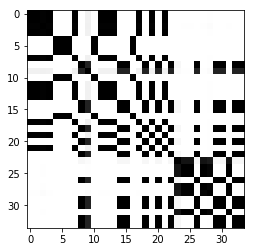

In [19]:
plt.imshow(consensus_mat2, cmap='Greys')